In [1]:
import DQN_components as agent_factory
from DQN_components.plotter import plot_trend

2024-10-16 15:06:01.020409: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 15:06:01.028291: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 15:06:01.052736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 15:06:01.097042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 15:06:01.109727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 15:06:01.138581: I tensorflow/core/platform/cpu_feature_gu

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Snake è risolto con Approximate Q-learning tramite neural network

Rappresentazione di stato semplificata con soli 11 valori

In [2]:
agent = agent_factory.Agent(lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, visual=False)
train_result = agent.train_agent(N_GAME=500)
plot_trend(train_result, extra_title="base")

Game: 176, Epsilon: 0.500000, Score: 0, Record: 3, Step eseguiti: 12236. 

KeyboardInterrupt: 

# Prioritized Experience Replay

Game: 500, Epsilon: 0.000000, Score: 28, Record: 46, Step eseguiti: 90150. 

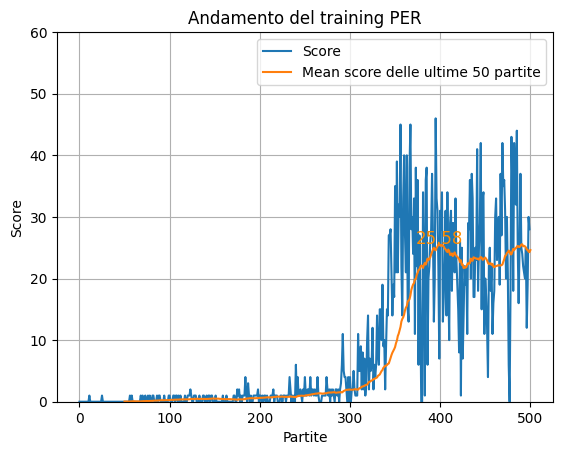

In [3]:
agent_per = agent_factory.Agent_PER(lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, visual=False)
train_result_per = agent_per.train_agent(N_GAME=500)
plot_trend(train_result_per, extra_title="PER")

# Double DQN

Game: 500, Epsilon: 0.000000, Score: 36, Record: 50, Step eseguiti: 91145. 

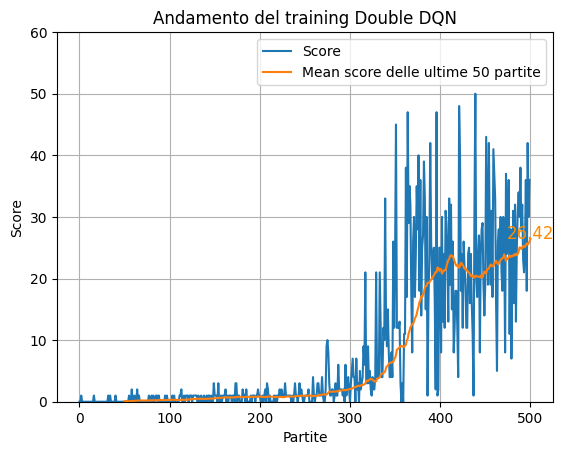

In [4]:
agent_doubledqn = agent_factory.Agent_DoubleDQN(lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, visual=False)
train_result_doubledqn = agent_doubledqn.train_agent(N_GAME=500)
plot_trend(train_result_doubledqn, extra_title="Double DQN")

# PER + DDQN

epsilon greedy policy

Game: 500, Epsilon: 0.000000, Score: 24, Record: 64, Step eseguiti: 86148. 

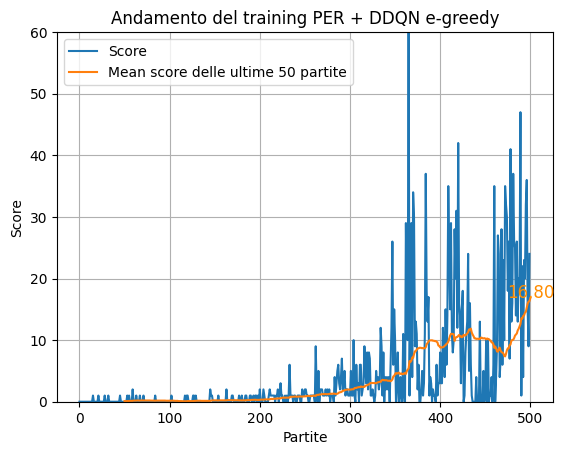

In [5]:
agent_ddqn_per_eps = agent_factory.Agent_DDQN_PER(lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, visual=False)
train_result_ddqn_per_eps = agent_ddqn_per_eps.train_agent(N_GAME=500)
plot_trend(train_result_ddqn_per_eps, extra_title="PER + DDQN e-greedy")

softmax policy

Game: 500, Epsilon: 0.000000, Score: 22, Record: 44, Step eseguiti: 144698. 

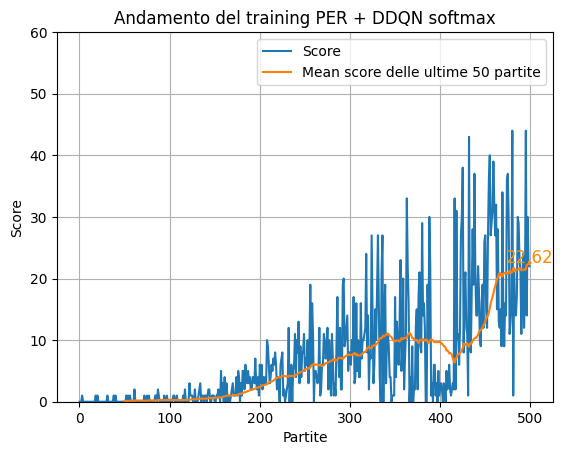

In [6]:
agent_ddqn_per_smx = agent_factory.Agent_DDQN_PER(lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024, 
                            model_units=[256], input_shape=[11], n_actions=3, eps_greedy=False, visual=False)
train_result_ddqn_per_smx = agent_ddqn_per_smx.train_agent(N_GAME=500)
plot_trend(train_result_ddqn_per_smx, extra_title="PER + DDQN softmax")

# Rappresentazione di stato più complessa: una matrice 7x7 al cui centro la testa di snake.